# Annotating workflows

Annotating workflows with pyiron as example. Note that `pyiron_atomistics` needs to be installed for this notebook.

In [1]:
%config IPCompleter.evaluation='unsafe'

In [2]:
from pyiron_atomistics import Project
from atomrdf import KnowledgeGraph, System, Workflow
import numpy as np

In [3]:
pr = Project('wf1c')

In [4]:
kg = KnowledgeGraph(store='db', store_file='kg_db.db')

In [5]:
kg.enable_workflow(pr, workflow_environment='pyiron')

In [6]:
structure = pr.create.structure.annotated_structure.bulk('Cu', cubic=True)

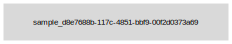

In [7]:
kg.visualise(workflow_view=True)

In [8]:
job = pr.create.job.Lammps('j1', delete_existing_job=True, delete_aborted_job=True)

In [9]:
job.structure = structure

In [10]:
job.potential = '2001--Mishin-Y--Cu-1--LAMMPS--ipr1'

In [11]:
job.calc_md(pressure=0, temperature=500)

In [12]:
job.run()

The job j1 was saved and received the ID: 52


In [13]:
kg.add_workflow(job, workflow_environment='pyiron')

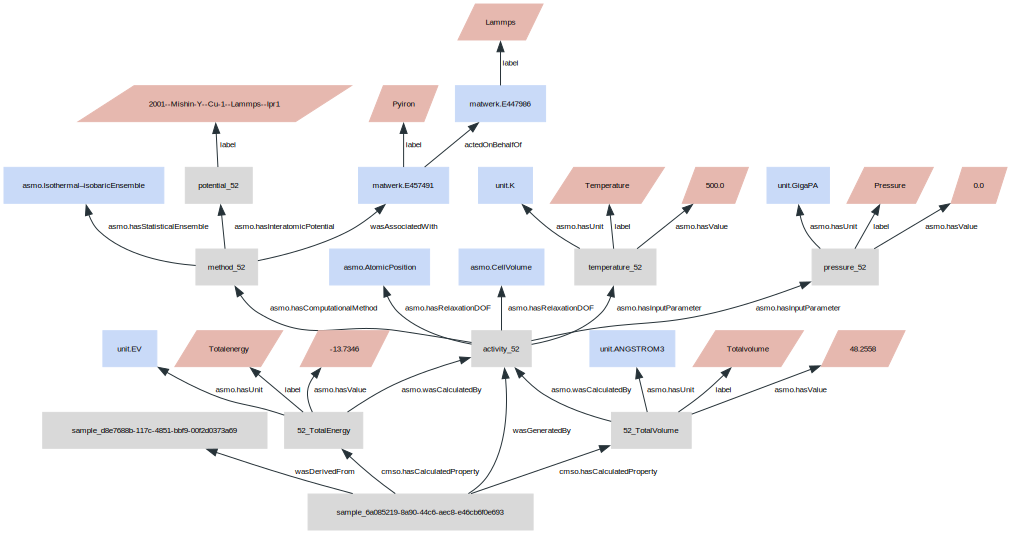

In [14]:
kg.visualise(workflow_view=True, hide_types=True, size=(15,15), layout='dot')